# Image Processing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Color Space Conversion

Text(0.5, 1.0, 'Original Image')

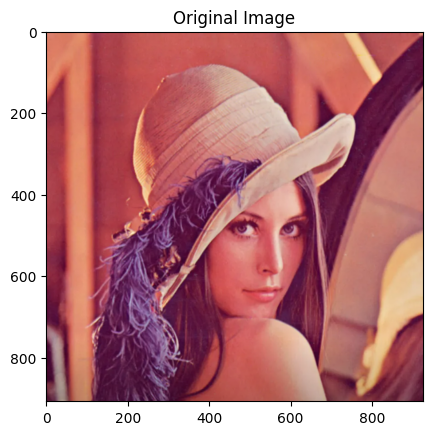

In [5]:
image = cv2.imread("../images/lenna.png")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

Text(0.5, 1.0, 'HSV Image')

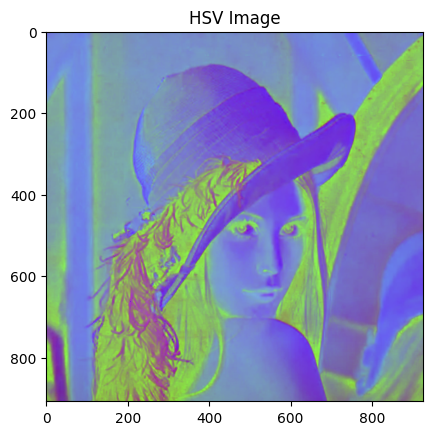

In [6]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

plt.imshow(hsv_image)
plt.title("HSV Image")

In [7]:
# Find the HSV values to track

green = np.uint8([[[0,255,0]]])

hsv_green = cv2.cvtColor(green, cv2.COLOR_BGR2HSV)

print(hsv_green)

[[[ 60 255 255]]]


# Geometric Transformation

### Scaling

Text(0.5, 1.0, 'Resized Image')

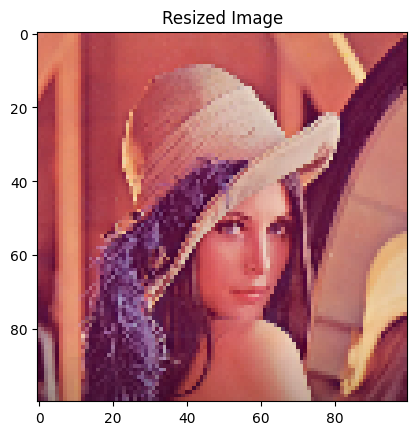

In [9]:
resized_image = cv2.resize(image, (100,100))

plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title("Resized Image")


### Translation

Text(0.5, 1.0, 'Translated Image')

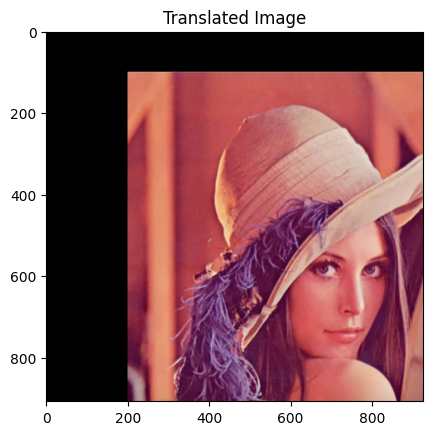

In [20]:
transformation_matrix = np.float32([[1, 0, 200], [0,1,100]])


rows, cols, channel = image.shape

translated_img = cv2.warpAffine(image, transformation_matrix, (cols, rows))

plt.imshow(cv2.cvtColor(translated_img, cv2.COLOR_BGR2RGB))
plt.title("Translated Image")

### Rotation

Text(0.5, 1.0, 'Rotated Image')

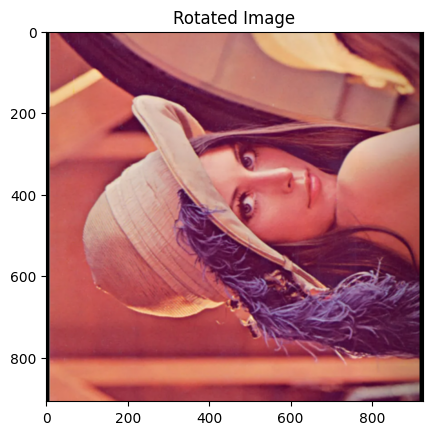

In [18]:
rows, cols, channel = image.shape

M = cv2.getRotationMatrix2D( 
                        ((cols-1)/2.0, (rows-1)/2.0),
                        90,
                        1
                            )
rotated_image = cv2.warpAffine(image, M, (cols, rows))
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")


### Affine Transformation
> In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then cv.getAffineTransform will create a 2x3 matrix which is to be passed to cv.warpAffine.

Text(0.5, 1.0, 'Original Image')

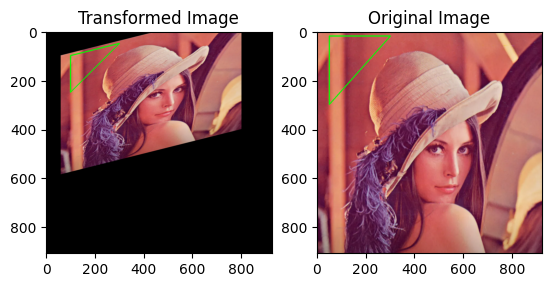

In [57]:
rows, cols, channel = image.shape

pts1 = np.float32([[50,20], [300,20], [50,300]])
pts2 = np.float32([[100,100], [300,50], [100,250]])

imagecpy = image.copy()
T_matrix = cv2.getAffineTransform(pts1, pts2)

transformed_image = cv2.warpAffine(image, T_matrix, (cols, rows))

polygon_points = np.array([pts2], np.int32)
cv2.polylines(transformed_image, [polygon_points], True, (0,255,0), 3)

polygon_points_original = np.array([pts1], np.int32)
cv2.polylines(imagecpy, [polygon_points_original], True, (0,255,0), 3)


plt.subplot(121)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image")

plt.subplot(122)
plt.imshow(cv2.cvtColor(imagecpy, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

### Perspective Transform
> For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function cv.getPerspectiveTransform. Then apply cv.warpPerspective with this 3x3 transformation matrix.

Text(0.5, 1.0, 'Original Image')

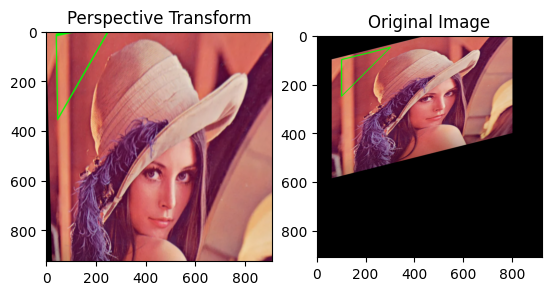

In [63]:
rows, cols, channel = transformed_image.shape

pts1 = np.float32([[60, 100], [700, 0], [30, 590], [790, 300]])
pts2 = np.float32([[0,0], [rows,0], [0,cols], [rows,cols]])

M = cv2.getPerspectiveTransform(pts1, pts2)

perspective_transformed = cv2.warpPerspective(transformed_image, M, (rows, cols))

plt.subplot(121)
plt.imshow(cv2.cvtColor(perspective_transformed, cv2.COLOR_BGR2RGB))
plt.title("Perspective Transform")

plt.subplot(122)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Thresholding

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 274.5, 182.5, -0.5)

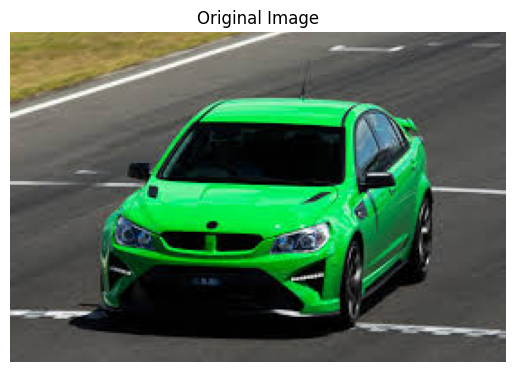

In [65]:
image = cv2.imread("../images/green_car.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Original Image")
plt.axis("Off")

### threshold

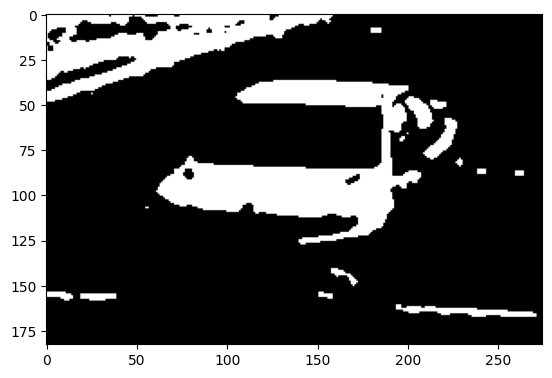

In [73]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

blur = cv2.medianBlur(gray, 5)

ret , th1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
plt.imshow(th1, cmap = 'gray')

### adaptive threshold

(-0.5, 274.5, 182.5, -0.5)

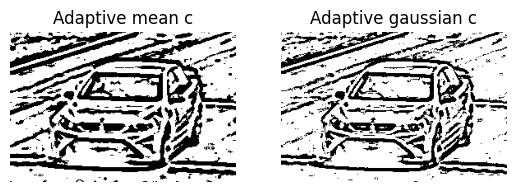

In [75]:
th2 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.subplot(121)
plt.imshow(th2, cmap = 'gray')
plt.title("Adaptive mean c")
plt.axis("off")

plt.subplot(122)
plt.imshow(th3, cmap = 'gray')
plt.title("Adaptive gaussian c")

plt.axis("off")

### Otsu Binarization
> In global thresholding, we used an arbitrary chosen value as a threshold. In contrast, Otsu's method avoids having to choose a value and determines it automatically.

Text(0.5, 1.0, 'Grayscale image')

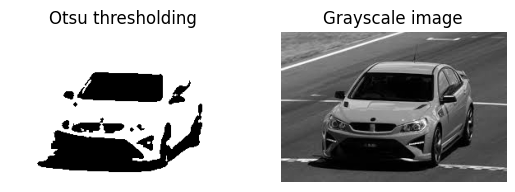

In [78]:
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(121)
plt.imshow(thresh, cmap = 'gray')
plt.axis("off")
plt.title("Otsu thresholding")

plt.subplot(122)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cmap = 'gray')
plt.axis("off")
plt.title("Grayscale image")

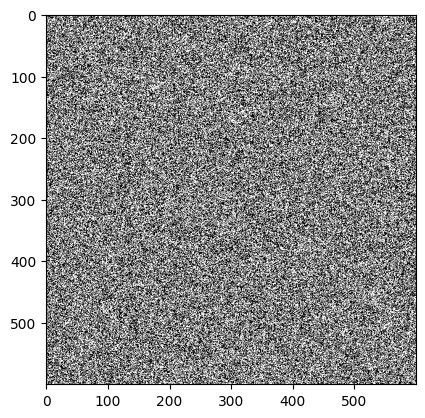

In [3]:
# noise image
import numpy as np
import matplotlib.pyplot as plt

noise_image = np.random.randint(0, 2, size = (600, 600))
plt.imshow(noise_image, cmap = 'gray')